In [1]:
library(ggplot2)
library(gridExtra)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘gridExtra’ was built under R version 4.2.3”
Warning message:
“package ‘cowplot’ was built under R version 4.2.3”


In [2]:
cell_type <- "PBMC"

In [3]:
# import paths 

nomic_data_path <- "./results/nELISA_plate_430420_umap_PBMC.csv"
nomic_data_selected_treatments_path <- "./results/nELISA_plate_430420_umap_PBMC_selected_treatments.csv"

# read data
nomic_data <- read.csv(nomic_data_path)
nomic_data_selected_treatments <- read.csv(nomic_data_selected_treatments_path)

head(nomic_data,2)
head(nomic_data_selected_treatments,2)


,Activin.A..NSU.,AITRL..GITR.Ligand...NSU.,Amphiregulin..NSU.,Amyloid.beta..NSU.,APRIL..NSU.,BAFF..NSU.,BCMA..TNFRSF17...NSU.,BDNF..NSU.,BMP2..NSU.,BMP3..NSU.,⋯,VEGF.C..NSU.,VEGF.D..NSU.,VEGFR.1..NSU.,WISP.1..CCN4...NSU.,XCL1..Lymphotactin...NSU.,Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose,umap_1,umap_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0.09770974,0.4616851,0.2704765,0.5146951,0.4792810,0.2704944,0.7088490,0.1344322,0.3509863,0.2169324,⋯,0.4904441,0.2588339,0.2383579,0.5242758,0.2506705,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025,-7.072029,14.23737
2,0.06451266,0.4511808,0.2462739,0.4710261,0.2697951,0.2044977,0.2476111,0.3220870,0.3506423,0.3492370,⋯,0.5895220,0.3811698,0.1686448,0.4550923,0.2287523,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025,-7.617855,16.30158


,Activin.A..NSU.,AITRL..GITR.Ligand...NSU.,Amphiregulin..NSU.,Amyloid.beta..NSU.,APRIL..NSU.,BAFF..NSU.,BCMA..TNFRSF17...NSU.,BDNF..NSU.,BMP2..NSU.,BMP3..NSU.,⋯,VEGF.C..NSU.,VEGF.D..NSU.,VEGFR.1..NSU.,WISP.1..CCN4...NSU.,XCL1..Lymphotactin...NSU.,Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose,umap_1,umap_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0.09770974,0.4616851,0.2704765,0.5146951,0.4792810,0.2704944,0.7088490,0.1344322,0.3509863,0.2169324,⋯,0.4904441,0.2588339,0.2383579,0.5242758,0.2506705,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025,-6.614442,11.67418
2,0.06451266,0.4511808,0.2462739,0.4710261,0.2697951,0.2044977,0.2476111,0.3220870,0.3506423,0.3492370,⋯,0.5895220,0.3811698,0.1686448,0.4550923,0.2287523,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025,-6.453297,12.75593


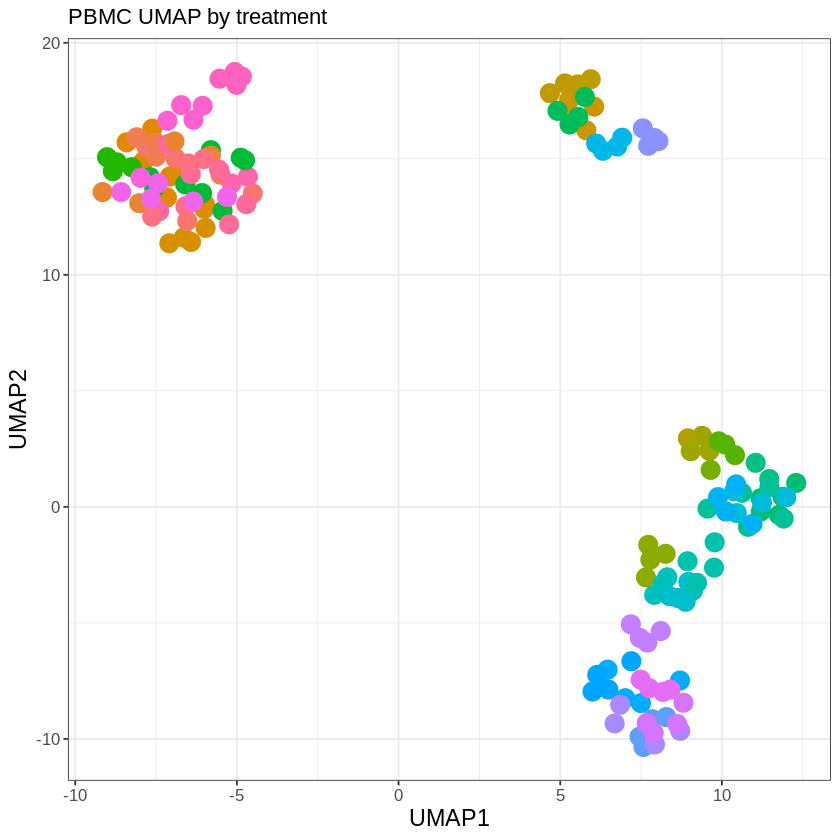

Saving 13.3 x 13.3 in image


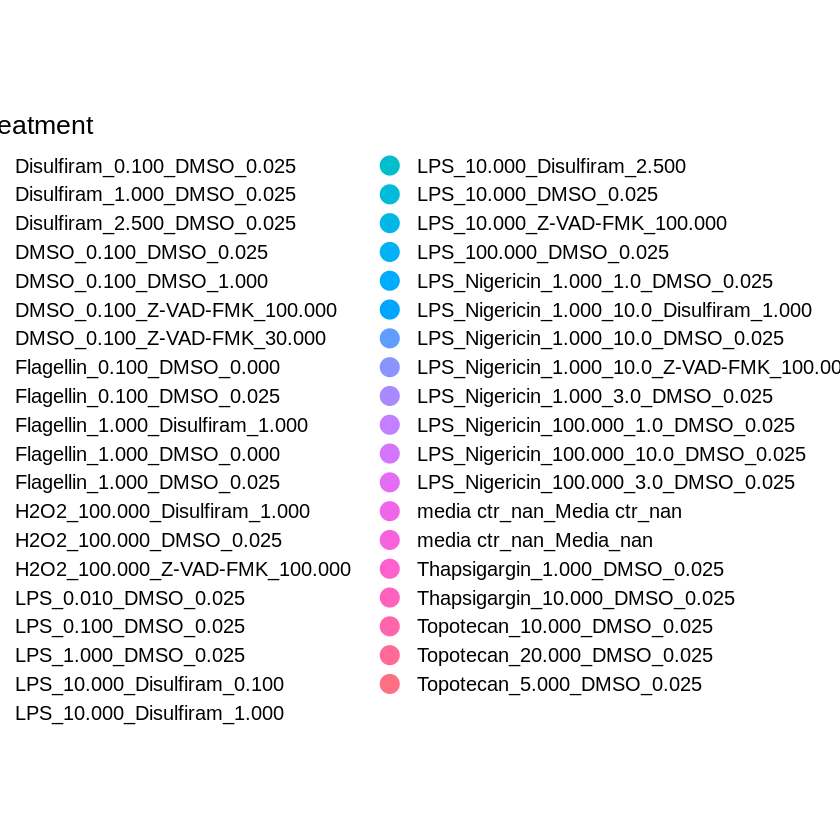

In [4]:
## plot the data
# set the plot size
# options(repr.plot.width=10, repr.plot.height=10)
nomic_data_plot <- (
    ggplot(nomic_data, aes(x = umap_1, y = umap_2, color = oneb_Metadata_Treatment_Dose_Inhibitor_Dose)) 
    + geom_point(size = 5) 
    # detach the legend and plot it separately
    + theme_bw()
    + theme(
        legend.position = "right",
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 16),
        strip.text = element_text(size = 8),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
            )
            )
    + guides(color = guide_legend(ncol = 2,title.position = 'top'))
    + labs(title = "PBMC UMAP by treatment",color="Treatment", x = "UMAP1", y = "UMAP2")
    # plot the legend separately
    

)
# extrtact the legend
legend <- get_legend(nomic_data_plot)

# remove the legend from the plot
nomic_data_plot <- (
    nomic_data_plot
    + theme(legend.position = "none")
)
# show the plot + legend
legend <- plot_grid(legend)
nomic_data_plot
legend

# save the plot
# set the path
plot_path <- paste0("./figures/","umap_by_all_treatment.png")
plot_legend_path <- paste0("./figures/","umap_by_all_treatment_legend.png")
# save the plot
ggsave(plot_path, nomic_data_plot, width = 8.5, height = 5.5, dpi = 500)
ggsave(plot_legend_path, legend,dpi = 500, scale = 2)

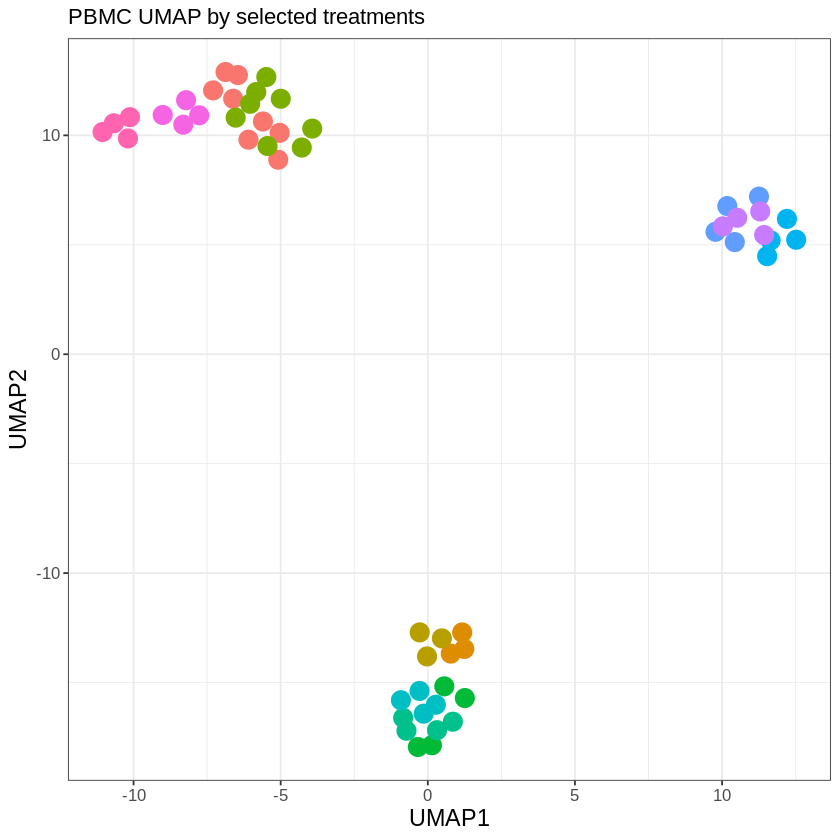

Saving 13.3 x 13.3 in image


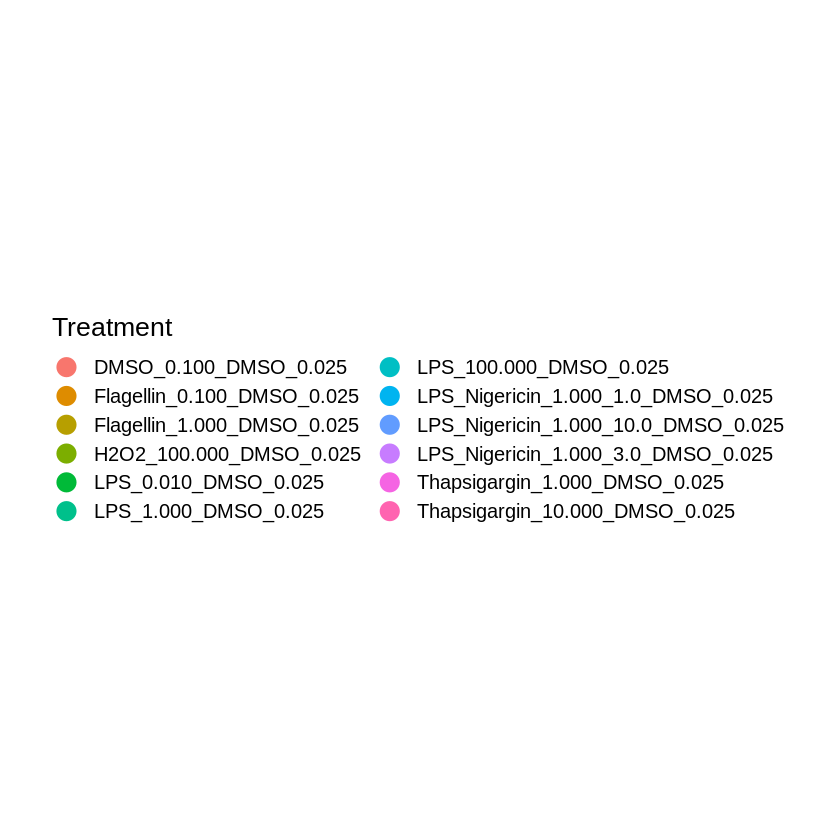

In [5]:
## plot the data
# set the plot size
# options(repr.plot.width=10, repr.plot.height=10)
nomic_data_selected_treatments_plot <- (
    ggplot(nomic_data_selected_treatments, aes(x = umap_1, y = umap_2, color = oneb_Metadata_Treatment_Dose_Inhibitor_Dose)) 
    + geom_point(size = 5) 
    # detach the legend and plot it separately
    + theme_bw()
    + theme(
        legend.position = "right",
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 16),
        strip.text = element_text(size = 8),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
            )
            )
    + guides(color = guide_legend(ncol = 2,title.position = 'top'))
    + labs(title = "PBMC UMAP by selected treatments",color="Treatment", x = "UMAP1", y = "UMAP2")
    # plot the legend separately
    

)
# extrtact the legend
nomic_data_selected_treatments_plot_legend <- get_legend(nomic_data_selected_treatments_plot)

# remove the legend from the plot
nomic_data_selected_treatments_plot <- (
    nomic_data_selected_treatments_plot
    + theme(legend.position = "none")
)
# show the plot + legend
nomic_data_selected_treatments_plot_legend <- plot_grid(nomic_data_selected_treatments_plot_legend)
nomic_data_selected_treatments_plot
nomic_data_selected_treatments_plot_legend

# save the plot
# set the path
plot_path <- paste0("./figures/","umap_by_selected_treatment.png")
plot_legend_path <- paste0("./figures/","umap_by_selected_treatment_legend.png")
# save the plot
ggsave(plot_path, nomic_data_selected_treatments_plot, width = 8.5, height = 5.5, dpi = 500)
ggsave(plot_legend_path, nomic_data_selected_treatments_plot_legend, dpi = 500, scale = 2)